# Credit Card Fraud Detection — Linear Regression Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, mean_squared_error

In [3]:
df = pd.read_csv('creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
print('Shape:', df.shape)
print(df['Class'].value_counts())

Shape: (568630, 31)
Class
0    284315
1    284315
Name: count, dtype: int64


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

In [6]:
model = Pipeline([
 ('scaler', StandardScaler()),
 ('linreg', LinearRegression())
])
model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('linreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [7]:
y_pred_cont = model.predict(X_test)
y_pred_class = (y_pred_cont >= 0.5).astype(int)

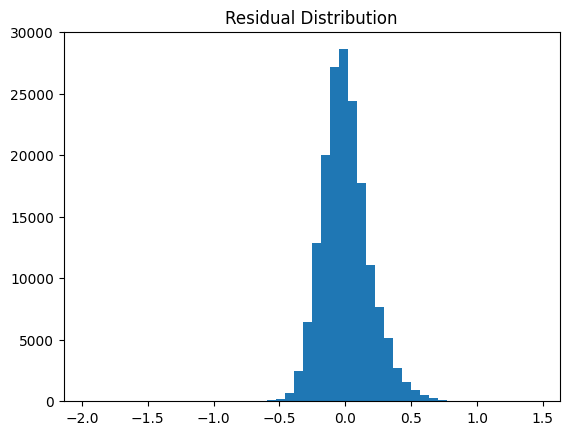

0.03244223450824044

In [8]:
y_pred_cont = model.predict(X_test)
residuals = y_test - y_pred_cont
mse = mean_squared_error(y_test, y_pred_cont)
plt.hist(residuals, bins=50)
plt.title('Residual Distribution')
plt.show()
mse

In [9]:
y_pred_class = (y_pred_cont >= 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_class)
acc

0.9890262560891968

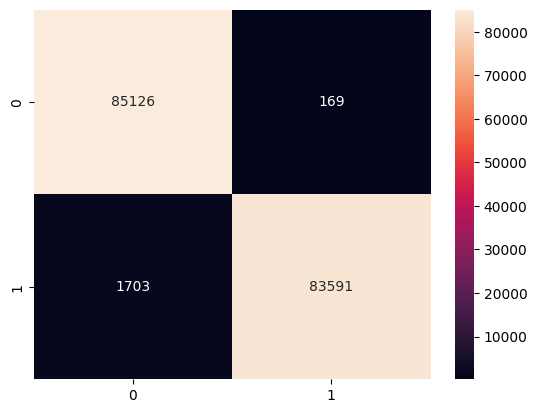

array([[85126,   169],
       [ 1703, 83591]])

In [10]:
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
cm

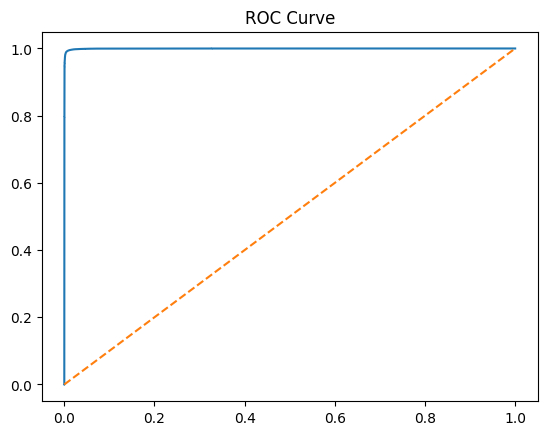

0.999460600803167

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_pred_cont)
auc = roc_auc_score(y_test, y_pred_cont)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title('ROC Curve')
plt.show()
auc